# 📊  Análise Exploratória (EDA)

In [3]:
# Importar bibliotecas necessárias
# !pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df_cp = pd.read_parquet('../datasets/consumo_eredes_normalizado_4610.parquet') # Abrir o ficheiro .parquet com os dados do código postal 4610
df_cp.head() # Visualizar as primeiras 5 linhas do DataFrame (útil para inspecionar os dados carregados)

,DateTime,Date,Hour,ZipCode,ActiveEnergy(kWh),Day,Month,Year,IsWeekend,TimeOfDay,DayOfTheWeek,Season,IsHoliday,Temperature,PopulationDensity,EnergyNormalized
0,2022-11-01 00:00:00,2022-11-01,0,4610,5507.876419,1,11,2022,0,Noite,Terça,Outono,1,12.9,172.95,0.036498
1,2022-11-01 01:00:00,2022-11-01,1,4610,4891.683130,1,11,2022,0,Noite,Terça,Outono,1,12.4,172.95,0.032414
2,2022-11-01 02:00:00,2022-11-01,2,4610,4572.159729,1,11,2022,0,Noite,Terça,Outono,1,11.9,172.95,0.030296
3,2022-11-01 03:00:00,2022-11-01,3,4610,4399.963917,1,11,2022,0,Noite,Terça,Outono,1,8.9,172.95,0.029155
4,2022-11-01 04:00:00,2022-11-01,4,4610,4354.933220,1,11,2022,0,Noite,Terça,Outono,1,9.9,172.95,0.028856


In [5]:
df_cp['EnergyNormalized'].describe() # Mostra estatísticas descritivas da coluna 'EnergyNormalized': count (nº de valores), mean (média), std (desvio padrão), min (valor mínimo), 25%, 50% (mediana), 75% (percentis) e max (valor máximo)

count    8016.000000
mean        0.068062
std         0.029369
min         0.005890
25%         0.044018
50%         0.057448
75%         0.091795
max         0.151722
Name: EnergyNormalized, dtype: float64

| Estatística         | Significado                                                                                                                                      |
|---------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| count = 8016    | Número total de observações (horas) para o código postal 4610, de 01-11-2022 00h até 30-09-2023 23h.                                             |
| mean = 0,0681       | Consumo médio normalizado: em média, o consumo horário fica em torno de 6,8% do valor máximo.            |
| std = 0,0294       | Desvio-padrão: mede a dispersão em torno da média. Aqui vemos que, tipicamente, o consumo se afasta ±≈0,03 (três pontos percentuais) do valor médio. |
| min = 0,0059          | O menor valor de consumo normalizado registrado — perto de zero, horário de demanda muito baixa.                                                 |
| 25% = 0,0440   | 25 % das horas tiveram consumo ≤ 0,044 (4,4 % do máximo).                                                                                        |
| 50% = 0,0574  | Metade dos períodos está abaixo de 0,057 (5,7 % do máximo) e metade acima.                                                                       |
| 75% = 0,0918  | 75% das horas estão abaixo de 0,0918; só 25% dos momentos chegam a consumos mais altos do que isso.                                              |
| max = 0,1517 | O maior consumo normalizado no CP 4610, cerca de 15,2% do valor de pico global usado na normalização.  |

# 📊 Dispersão: Consumo vs Temperatura
###### Ajuda a perceber se há correlação entre temperatura e consumo.

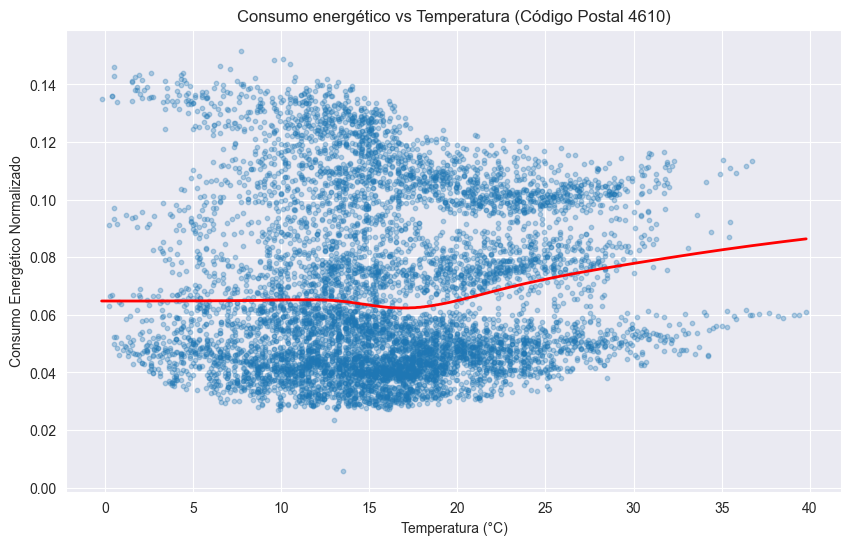

In [6]:
plt.figure(figsize=(10,6)) # Cria uma nova figura com tamanho 10x6 polegadas

# Cria um gráfico de dispersão com linha de tendência suavizada (LOWESS)
sns.regplot(
    data=df_cp,                       # Dados a usar
    x="Temperature",                  # Eixo X: temperatura
    y="EnergyNormalized",             # Eixo Y: consumo energético normalizado
    lowess=True,                      # Usa LOWESS para suavizar a linha de tendência
    scatter_kws={"s":10, "alpha": 0.3},  # Tamanho e transparência dos pontos
    line_kws={"color": "red", "lw": 2}   # Cor e espessura da linha de tendência
)

plt.title("Consumo energético vs Temperatura (Código Postal 4610)") # Título do gráfico
plt.xlabel("Temperatura (°C)") # Rótulo do eixo X
plt.ylabel("Consumo Energético Normalizado") # Rótulo do eixo Y
plt.grid(True) # Adiciona grelha ao fundo do gráfico
plt.savefig('../figuras/dispersao-consumo-vs-temperatura.png') # Guarda o gráfico como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento               | Interpretação                                                                                                                                                                                                                                                                                                                       |
|------------------------| ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Distribuição dos pontos | O nuvem de pontos mostra que, em temperaturas muito baixas (perto de 0 °C), há vários registros de consumo elevado (até \~0.14), e em temperaturas amenas (\~10–20 °C) o consumo fica mais baixo e concentrado (entre \~0.03 e \~0.08). Em climas quentes (>25 °C) os pontos voltam a se espalhar em níveis moderados (até \~0.10). |
| Padrão geral           | Observa-se um “U” invertido: consumo mais alto nos extremos (muito frio e muito calor) e menor próximo da faixa de conforto térmico (15–20 °C).                                                                                                                                                                                     |
| Linha de tendência     | A curva suavizada (linha vermelha) decresce ligeiramente de 0 °C até cerca de 18 °C, indicando menor demanda, e depois volta a subir de 18 °C a 40 °C, refletindo maior uso em temperaturas altas.                                                                                                                                  |
| Possíveis causas       | Em baixas temperaturas, maior uso de aquecimento; em temperaturas amenas, demanda reduzida pois nem aquecimento nem ar-condicionado são necessários; em altas temperaturas, aumento de carga devido ao uso de refrigeração (ar-condicionado).                                                                                       |


# 📊 Boxplot de consumo por estação do ano
###### Explora variações sazonais no consumo.

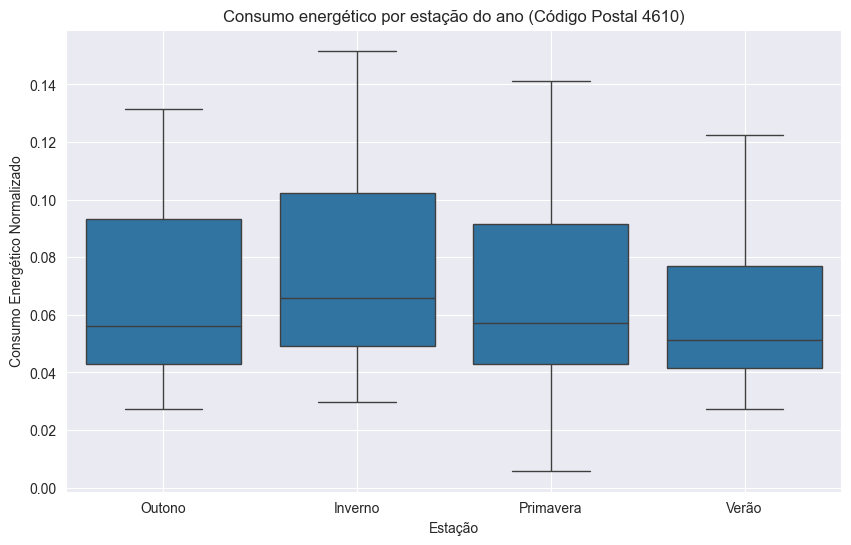

In [7]:
plt.figure(figsize=(10,6)) # Cria uma nova figura com tamanho 10x6 polegadas

# Cria um boxplot para visualizar a distribuição do consumo energético por estação do ano
sns.boxplot(
    data=df_cp,              # Dados a utilizar
    x="Season",              # Eixo X: estação do ano (ex: Primavera, Verão, etc.)
    y="EnergyNormalized"     # Eixo Y: consumo energético normalizado
)

plt.title("Consumo energético por estação do ano (Código Postal 4610)") # Define o título do gráfico
plt.xlabel("Estação") # Rótulo do eixo X
plt.ylabel("Consumo Energético Normalizado") # Rótulo do eixo Y
plt.grid(True) # Adiciona grelha ao fundo do gráfico
plt.savefig('../figuras/boxplot-consumo-por-estacao.png') # Guarda o gráfico como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento    | Interpretação                                                                                                                                                                                                              |
| ----------- |----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Distribuição geral | O consumo normalizado tende a ser mais elevado no **inverno**, com a caixa (“IQR”) deslocada para cima em relação às outras estações. Outono e primavera apresentam distribuição intermediária e o verão, a mais baixa.    |
| Mediana     | - Outono: \~0,055<br>- Inverno: \~0,065<br>- Primavera: \~0,056<br>- Verão: \~0,049                                                                                                                                        |
| Outliers    | No **inverno** aparecem vários outliers acima de 0,14 (pico de consumo muito alto). Outono e primavera também têm pontos atípicos elevados (\~0,13). No verão há poucos outliers extremos, concentrados acima de 0,12.     |
| Possíveis causas | - **Inverno**: aumento do uso de aquecimento e iluminação, dias mais curtos e frios.<br>- **Outono/Primavera**: transição de estações, variação moderada de temperatura.<br>- **Verão**: menor necessidade de aquecimento. |

# 📊 Consumo energético ao longo do tempo (linha temporal)
###### Uma linha de tendência geral para verificar anomalias ou sazonalidade

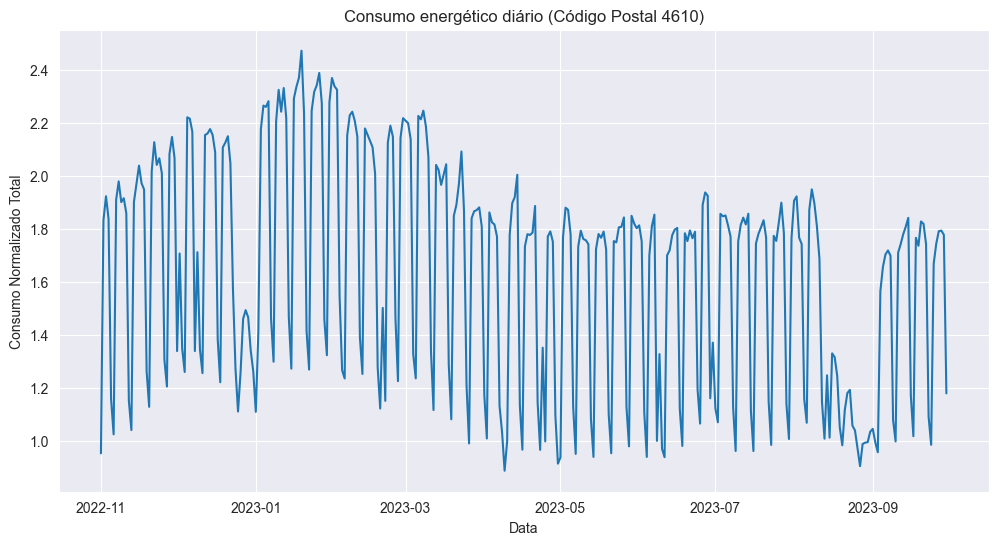

In [8]:
df_daily = df_cp.groupby("Date").agg({"EnergyNormalized": "sum"}).reset_index() # Agrupa os dados por data (coluna "Date") e calcula o total diário de consumo energético normalizado
plt.figure(figsize=(12,6)) # Cria uma nova figura com tamanho 12x6 polegadas

# Cria um gráfico de linha para mostrar a evolução do consumo energético ao longo do tempo
sns.lineplot(
    data=df_daily,          # Dados agregados por dia
    x="Date",               # Eixo X: datas
    y="EnergyNormalized"    # Eixo Y: soma do consumo energético normalizado por dia
)

plt.title("Consumo energético diário (Código Postal 4610)") # Define o título do gráfico
plt.xlabel("Data") # Rótulo do eixo X
plt.ylabel("Consumo Normalizado Total") # Rótulo do eixo Y
plt.grid(True) # Adiciona grelha ao fundo do gráfico
plt.savefig('../figuras/consumo-ao-longo-do-tempo.png') # Guarda o gráfico como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento        | Interpretação                                                                                                                                                                                                                                               |
|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Tendência geral | Até ao final do inverno (jan–fev) o consumo diário vai subindo progressivamente, atingindo níveis médios acima de 2,2 × consumo normalizado. A partir de março–abril inicia-se uma tendência de queda até ao verão, com valores diários em torno de 1,0–1,2. |
| Picos e quedas  | Os maiores picos (≈ 2,4–2,5) ocorrem nos meses mais frios (jan–fev). Há quedas acentuadas na transição primavera (mar–abr) à medida que as temperaturas sobem, sendo o valor mínimo registado próximo de 0,9 no final de setembro.                          |
| Estabilidade    | Após o pico invernal, o consumo estabiliza em patamares mais baixos (≈ 1,6–1,8) durante a primavera/verão, exibindo flutuações diárias mais suaves e menos dispersão em torno da média.                                                                     |
| Variação ao longo do tempo | A amplitude de variação diária é mais alta no inverno (dias de maior demanda de aquecimento) e reduz-se no verão (demanda mais constante), refletindo claramente a sazonalidade térmica ao longo do ano.                                                    |


# 📊 Histograma da energia consumida (distribuição geral)
###### Mostra a distribuição dos consumos (e potenciais outliers).

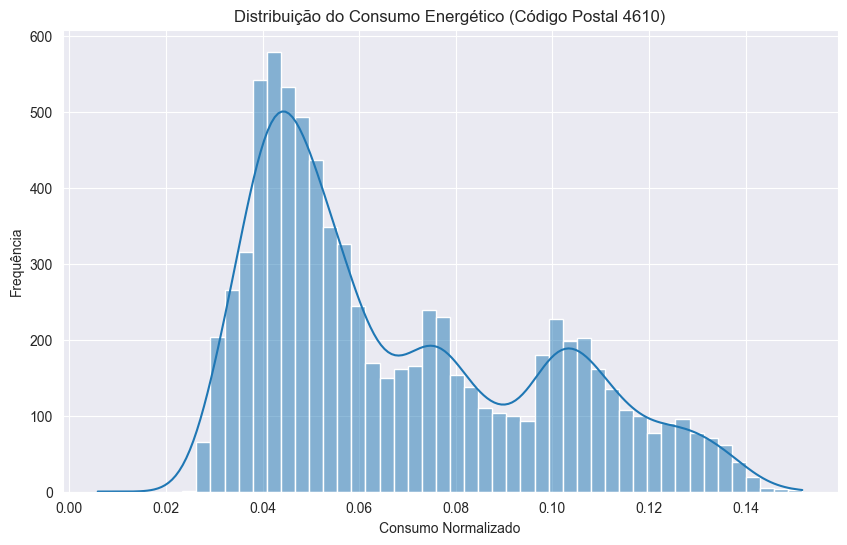

In [9]:
plt.figure(figsize=(10,6)) # Cria uma nova figura com tamanho 10x6 polegadas

# Cria um histograma da coluna 'EnergyNormalized' com 50 bins e curva de densidade (kde)
sns.histplot(
    df_cp["EnergyNormalized"],  # Dados a visualizar
    bins=50,                    # Número de divisões (barras) no histograma
    kde=True                    # Mostra a curva de densidade para indicar a forma da distribuição
)

plt.title("Distribuição do Consumo Energético (Código Postal 4610)") # Define o título do gráfico
plt.xlabel("Consumo Normalizado") # Rótulo do eixo X
plt.ylabel("Frequência") # Rótulo do eixo Y
plt.grid(True) # Adiciona grelha ao fundo do gráfico
plt.savefig('../figuras/histograma-da-energia-consumida.png') # Guarda o histograma como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento               | Interpretação                                                                                                                                                      |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Distribuição dos dados | A maioria das observações concentra-se entre 0.03 e 0.08; a forma sugere leve bimodalidade (com dois “ombros” em torno de 0.045 e 0.10) e é assimétrica à direita. |
| Moda (valor mais comum) | Aproximadamente **0.045** – o intervalo em torno de 0.04–0.05 é o que apresenta a maior frequência de valores.                                                     |
| Cauda longa            | Há poucas ocorrências acima de 0.10 até cerca de 0.15, indicando raros períodos de consumo muito elevados em relação ao grosso dos dados.                          |

# 📊 Boxplot do consumo energético

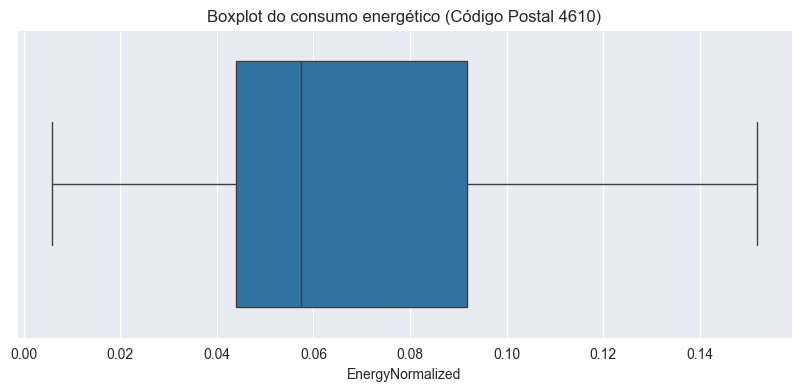

In [10]:
plt.figure(figsize=(10, 4)) # Cria uma nova figura com tamanho 10x4 polegadas (formato horizontal)
sns.boxplot(x=df_cp['EnergyNormalized']) # Cria um boxplot da coluna 'EnergyNormalized' para visualizar a distribuição global do consumo energético
plt.title("Boxplot do consumo energético (Código Postal 4610)") # Define o título do gráfico
plt.savefig('../figuras/boxplot-consumo-energetico.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras' com resolução 300 dpi. bbox_inches='tight' garante que o conteúdo não fica cortado
plt.show() # Mostra o gráfico

# 📈 Interpretação:
* **IQR (caixa)**: vai de aproximadamente **0,044** (1º quartil) a **0,092** (3º quartil). Isso significa que **50%** dos valores de consumo normalizado estão dentro desse intervalo.

* **Mediana**: marcada pela linha interna na caixa, fica em torno de **0,057**, indicando o ponto central da distribuição.

* **Whiskers (bigodes)**:
  * **Inferior** em cerca de **0,0059** (mínimo observado após remover lags),
  * **Superior** em cerca de **0,1517** (máximo observado).
    Não há pontos isolados fora dos bigodes, ou seja, estatisticamente não há “outliers” definidos pelo critério 1,5 × IQR.

* **Assimetria**: o bigode superior é mais longo que o inferior, sugerindo uma **assimetria à direita**—há alguns dias com consumo elevado, mas a maior parte das observações concentra-se em valores baixos.

* **Amplitude total**: intervalo de aproximadamente **0,146** unidades normalizadas, evidenciando **variabilidade significativa** no consumo ao longo do período considerado.

In [11]:
df_cp.set_index('DateTime', inplace=True) # Define a coluna 'DateTime' como índice do DataFrame. Isso é útil para análises temporais, como resampling, rolling averages, etc.

# 📊Consumo total por mês

In [12]:
df_mensal = df_cp.groupby(['Year', 'Month'])['EnergyNormalized'].sum().reset_index() # Agrupar os dados por ano e mês, somando o consumo energético normalizado em cada grupo

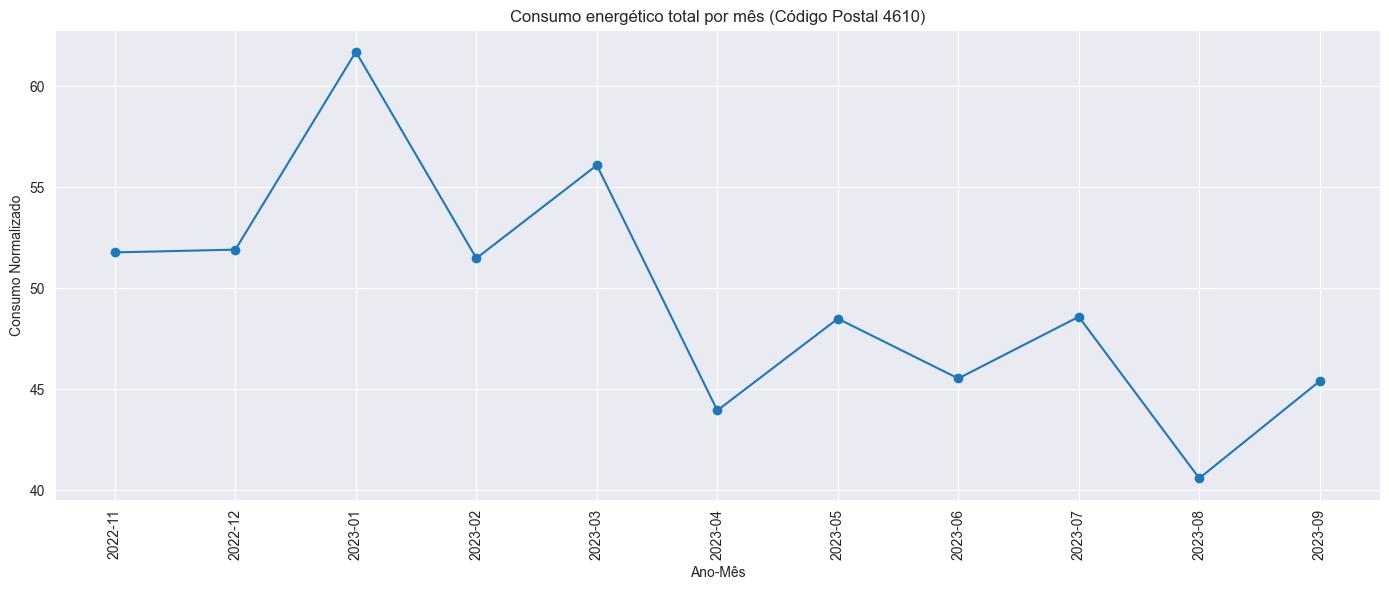

In [13]:
df_mensal['Label'] = df_mensal['Year'].astype(str) + '-' + df_mensal['Month'].astype(str).str.zfill(2) # Criar uma nova coluna 'Label' com o formato "AAAA-MM" para facilitar a leitura no eixo X. .astype(str) converte os inteiros para strings e .zfill(2) garante dois dígitos no mês (ex: "07")

plt.figure(figsize=(14, 6)) # Cria uma figura com tamanho 14x6 polegadas
plt.plot(df_mensal['Label'], df_mensal['EnergyNormalized'], marker='o') # Gera um gráfico de linha com marcadores para cada mês

# Define o título e os rótulos dos eixos
plt.title('Consumo energético total por mês (Código Postal 4610)')
plt.xlabel('Ano-Mês')
plt.ylabel('Consumo Normalizado')

plt.grid(True) # Adiciona grelha ao gráfico
plt.xticks(rotation=90)  # Roda os rótulos do eixo X para 90º para evitar sobreposição
plt.tight_layout() # Ajusta automaticamente os elementos para caberem bem na figura
plt.savefig('../figuras/consumo-energetico-por-mes.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras', com alta resolução (300 dpi)
plt.show() # Mostra o gráfico

# 📈 Interpretação
* **Novembro–Dezembro (≈51–52)**: consumo relativamente estável no início do período, refletindo o clima ameno de outono/início de inverno.
* **Janeiro (≈62)**: pico máximo do ano, por conta do rigor do inverno — maior uso de aquecimento e pouca luminosidade natural.
* **Fevereiro (≈51) → Março (≈56)**: queda brusca após o pico de janeiro, seguida de leve alta em março, sinalizando a transição do inverno para a primavera.
* **Abril (≈44)**: consumo já bem reduzido, possivelmente por dias mais amenos e início de feriados de Páscoa.
* **Maio (≈48)**: leve recuperação, clima de primavera ainda requer algum aquecimento/resfriamento pontual.
* **Junho (≈45) → Julho (≈48)**: padrão oscilante, com junho mais baixo (clima muito ameno) e julho ligeiro aumento (eventual uso de ar-condicionado ou retomada de atividades).
* **Agosto (≈40)**: valor **mínimo do ano**, possivelmente influenciado por férias prolongadas de verão e menor ocupação residencial, reduzindo o consumo agregado.
* **Setembro (≈45)**: retomada moderada ao final do verão, já com transição para temperaturas mais amenas.

> **Conclusão:** há um claro **padrão sazonal** com **máximos no auge do inverno** (janeiro) e **mínimos no pico do verão** (agosto), intercalados por oscilações que acompanham a transição de estações e fatores como feriados e hábitos de ocupação residencial.



# 📊 Consumo medio por hora do dia

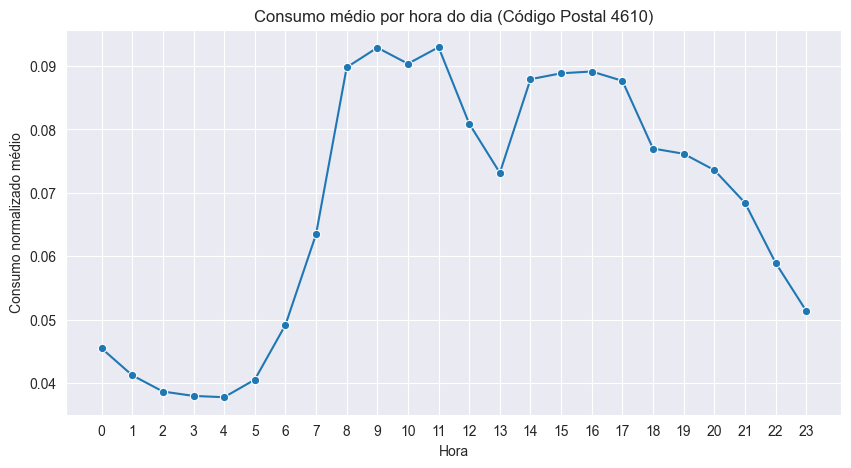

In [14]:
media_por_hora = df_cp.groupby('Hour')['EnergyNormalized'].mean() # Calcula a média do consumo energético normalizado para cada hora do dia (0 a 23)

plt.figure(figsize=(10,5)) # Cria uma nova figura com tamanho 10x5 polegadas

# Gera um gráfico de linha com os valores médios por hora
sns.lineplot(
    x=media_por_hora.index,   # Eixo X: horas do dia (0 a 23)
    y=media_por_hora.values,  # Eixo Y: média do consumo normalizado
    marker='o'                # Adiciona marcadores aos pontos da linha
)

# Define o título e os rótulos dos eixos
plt.title('Consumo médio por hora do dia (Código Postal 4610)')
plt.xlabel('Hora')
plt.ylabel('Consumo normalizado médio')

plt.grid(True) # Adiciona grelha ao gráfico
plt.xticks(range(0, 24)) # Define os ticks do eixo X de 0 a 23 (uma marca por hora)
plt.savefig('../figuras/consumo-medio-por-hora-do-dia.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras', com alta resolução
plt.show() # Mostra o gráfico

# 📈 Interpretação

| Hora    | Observação                                                                                                                                                            |
| ------- |-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 00h–05h | **Consumo mínimo** do dia (≈0.038–0.046) — é o período de sono e inatividade, com praticamente só cargas essenciais (frigorificos, bombas, etc.).                     |
| 06h–07h | **Aquecimento inicial** (≈0.049→0.063) — começo das atividades residenciais: iluminação, chuveiros, preparação do pequeno almoço, além de início parcial do comércio. |
| 08h–11h | **Pico matinal** (≈0.090–0.093) — sobreposição forte de uso comercial/industrial e doméstico (cozinhar, ar-condicionado/aquecimento, escritórios).                    |
| 12h–13h | **Recuo pós-almoço** (≈0.081→0.073) — horário de pico de almoço, muitas empresas fecham parcialmente atividades, reduzindo o consumo agregado.                        |
| 14h–16h | **Platô vespertino** (≈0.089–0.090) — retomada da atividade (escritórios, indústrias), mantendo consumo quase tão alto quanto no pico da manhã.                       |
| 17h–20h | **Declínio gradual** (≈0.078→0.073) — final do expediente, retorno ao lar, uso moderado de eletrodomésticos e pouco volume comercial.                                 |
| 21h–23h | **Queda para níveis noturnos** (≈0.068→0.051) — encerramento das principais atividades, restando apenas cargas de suporte e lazer doméstico leve.                     |

# 📊 Consumo medio por dia da semana

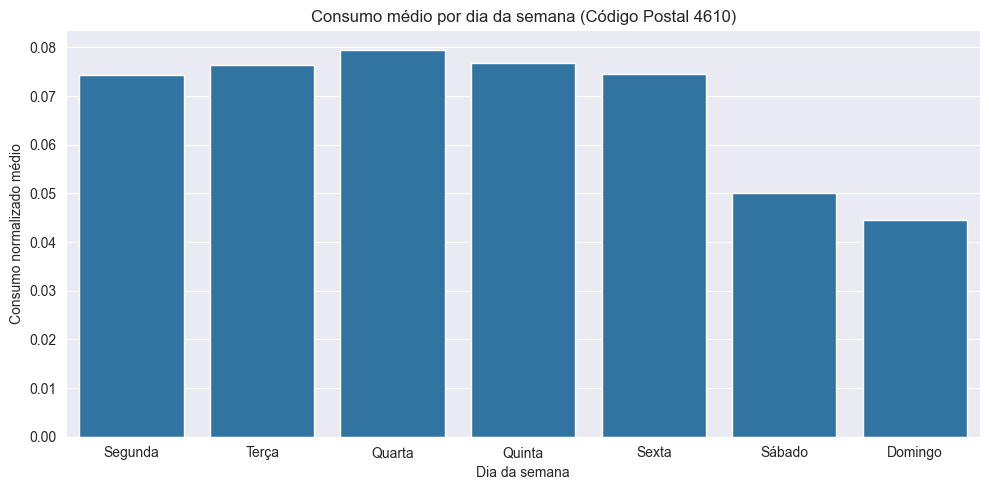

In [15]:
media_por_dia_semana = df_cp.groupby('DayOfTheWeek')['EnergyNormalized'].mean() # Calcula o consumo energético normalizado médio para cada dia da semana

# Ordenar os dias da semana (opcional, mas útil para garantir ordem cronológica)
ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
media_por_dia_semana = media_por_dia_semana.reindex(ordem_dias)

plt.figure(figsize=(10, 5)) # Cria uma nova figura com tamanho 10x5 polegadas

# Cria um gráfico de barras com o consumo médio por dia da semana
sns.barplot(
    x=media_por_dia_semana.index,   # Eixo X: dias da semana (ordenados)
    y=media_por_dia_semana.values   # Eixo Y: consumo médio
)

# Define o título e os rótulos dos eixos
plt.title('Consumo médio por dia da semana (Código Postal 4610)')
plt.xlabel('Dia da semana')
plt.ylabel('Consumo normalizado médio')

plt.grid(True, axis='y') # Adiciona grelha apenas no eixo Y (valores)
plt.tight_layout() # Ajusta automaticamente os elementos da figura para melhor visualização
plt.savefig('../figuras/consumo-medio-por-dia-da-semana.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras' com alta resolução
plt.show() # Mostra o gráfico

# 📈 Interpretação

| Dia da semana | Observação                                                                                                                             |
|---------------|----------------------------------------------------------------------------------------------------------------------------------------|
| 2f a 6f       | Consumo elevado e relativamente estável (≈0.074–0.075), refletindo dias úteis com forte atividade residencial, comercial e industrial. |
| 4f            | Pico semanal (≈0.079) — o ponto de maior demanda no meio da semana, talvez por acumulação de atividades residenciais e empresariais.   |
| 5f e 6f       | Leve declínio após o pico de 4f (≈0.077 e ≈0.075), sinalizando o início da desaceleração rumo ao fim de semana.                        |
| Sábado        | Queda expressiva (≈0.050) — comércios e indústrias fechados em grande parte, o consumo residencial livre apresenta menos variação.     |
| Domingo       | Valor mínimo da semana (≈0.045) — dia típico de descanso, com menor uso de luz, eletrodomésticos e atividades gerais.                  |

# 📊 consumo medio por mês

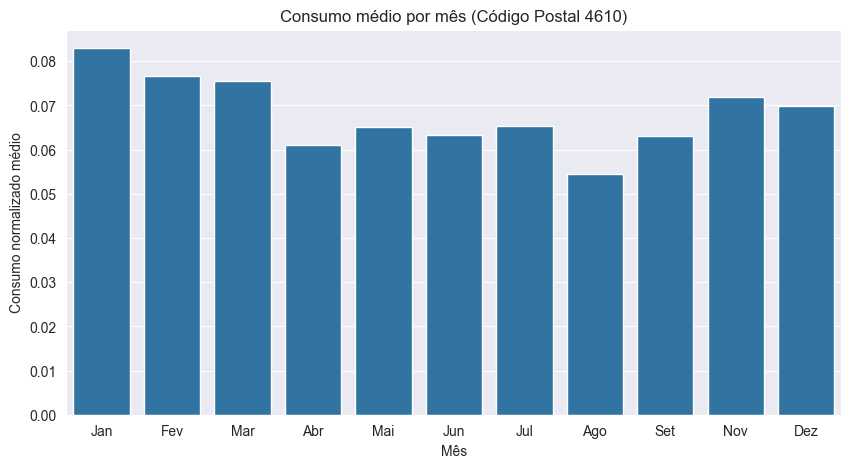

In [16]:
media_por_mes = df_cp.groupby('Month')['EnergyNormalized'].mean() # Calcula o consumo energético normalizado médio para cada mês (1 a 12)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'] # Lista com os nomes dos meses, usada para melhorar a apresentação no eixo X

plt.figure(figsize=(10,5)) # Cria uma nova figura com tamanho 10x5 polegadas

# Cria um gráfico de barras com os meses no eixo X e o consumo médio no eixo Y
sns.barplot(
    x=[meses[i-1] for i in media_por_mes.index],  # Converte o índice numérico dos meses em nomes abreviados
    y=media_por_mes.values                        # Valores do consumo médio
)

# Define o título e os rótulos dos eixos
plt.title('Consumo médio por mês (Código Postal 4610)')
plt.xlabel('Mês')
plt.ylabel('Consumo normalizado médio')

plt.grid(True, axis='y') # Adiciona grelha no eixo Y (valores)
plt.savefig('../figuras/consumo-medio-por-mes.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras', com alta resolução
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Mês       | Observação                                                                                                                                                                           |
| --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Jan e Fev | Pico anual (≈ 0.082 em jan, ≈ 0.077 em fev), refletindo o inverno rigoroso: uso intensivo de aquecimento, iluminação prolongada e maior permanência em ambientes fechados.           |
| Mar       | Pequena queda (≈ 0.075), marcando a transição para a primavera, com dias gradualmente mais longos e temperaturas mais amenas.                                                        |
| Abr e Mai | Queda acentuada em abril (≈ 0.061) seguida de ligeira recuperação em maio (≈ 0.065), à medida que o clima esquenta e o uso de aquecimento diminui, mas aumentam atividades externas. |
| Jun a Set | Valores relativamente estáveis (≈ 0.063–0.065 em jun/jul) e mínimo em ago (≈ 0.055), típico do verão: uso moderado de ar-condicionado e rotinas residenciais menos intensas.         |
| Nov e Dez | Retomada de alta (≈ 0.072 em nov, ≈ 0.070 em dez), iniciando o outono e aproximando-se do inverno, com aumento do uso de aquecimento e iluminação novamente.                         |

# 📊 Grafico: observed series

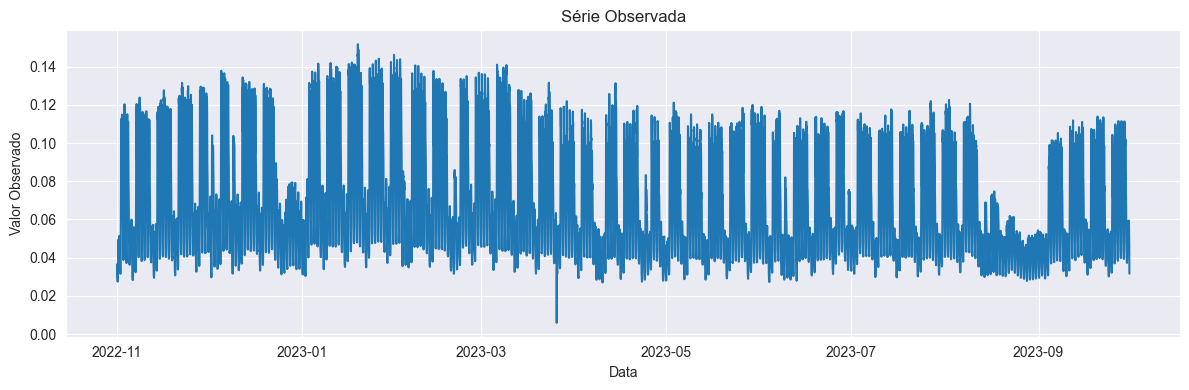

In [17]:
series = df_cp['EnergyNormalized'] # Extrai a série temporal da coluna 'EnergyNormalized' (consumo energético por hora)

result = seasonal_decompose(series, model='additive', period=24) # Aplica a decomposição sazonal usando um modelo aditivo. period=24 assume que há um padrão diário (24 horas) a ser identificado
plt.figure(figsize=(12, 4)) # Cria uma nova figura para visualizar a série observada
plt.plot(result.observed, color='tab:blue') # Plota a série observada (valores originais da série temporal)

# Define o título e os rótulos dos eixos
plt.title('Série Observada')
plt.ylabel('Valor Observado')
plt.xlabel('Data')

plt.tight_layout() # Ajusta o layout para evitar cortes
plt.savefig(f'../figuras/observed-series.png', dpi=300, bbox_inches='tight') # Guarda a imagem da série observada como ficheiro PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento                      | Interpretação                                                                                                                                             |
| ----------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Ciclos diários                | Padrões repetitivos de 24h: picos de consumo durante o dia e vales à noite refletem rotina “atividades × repouso”.                                        |
| Variação sazonal da amplitude | Amplitude dos picos varia conforme a estação: no inverno (Nov–Fev) atinge \~0.14; no verão (Jun–Ago) fica abaixo de \~0.10, indicando influência do clima. |
| Tendência de longo prazo      | Leve declínio da média de consumo de Jan a Abr/23, seguida de estabilização no verão e pequeno aumento em Set/23 — possível efeito de fatores externos.   |
| Ruído e anomalias             | Pequenas oscilações fora do ciclo diário (ruído normal); ao menos uma queda abrupta (Mar/23) possivelmente por falha de medição ou evento atípico.        |
| Cobertura temporal            | Série contínua hora a hora, sem lacunas significativas, garantindo base robusta para modelagem e previsão.                                                |

# 📊 Grafico: trend

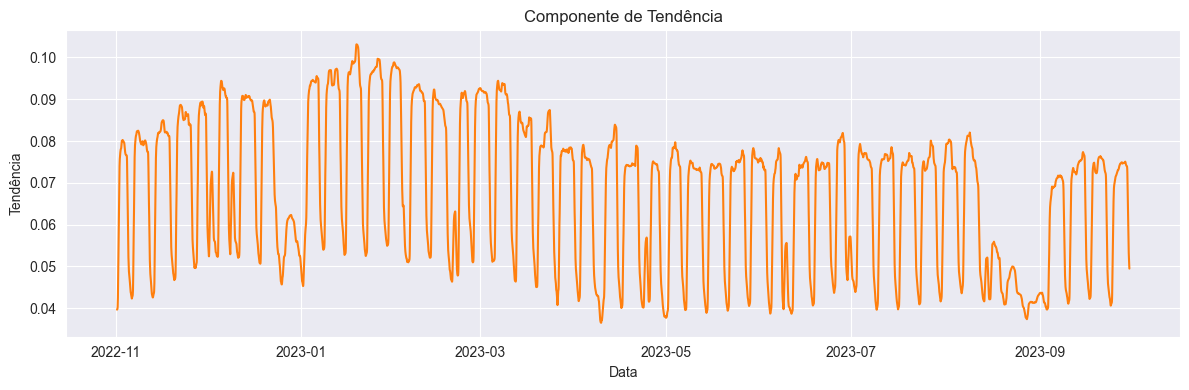

In [18]:
series = df_cp['EnergyNormalized'] # Extrai a série horária de consumo energético normalizado

result = seasonal_decompose(series, model='additive', period=24) # Aplica a decomposição sazonal da série temporal utilizando um modelo aditivo. period=24 assume um padrão diário (sazonalidade a cada 24 horas)
plt.figure(figsize=(12, 4)) # Cria uma nova figura com tamanho 12x4 polegadas para visualizar a tendência
plt.plot(result.trend, color='tab:orange') # Plota a componente de tendência extraída da decomposição

# Define o título e os rótulos dos eixos
plt.title('Componente de Tendência')
plt.ylabel('Tendência')
plt.xlabel('Data')

plt.tight_layout() # Ajusta o layout para evitar cortes de conteúdo
plt.savefig(f'../figuras/trend.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento                    | Interpretação                                                                                                                                            |
| --------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Nível inicial               | Em novembro de 2022 a tendência começa em torno de 0.04–0.05, refletindo consumo já moderadamente elevado no início do inverno.                          |
| Aumento até o pico invernal | Dezembro a janeiro mostram subida contínua até \~0.10–0.11, indicando maior uso de aquecimento e menos luz natural, típico do inverno.                   |
| Declínio na transição       | A partir de fevereiro–março ocorre queda gradual até \~0.06 em abril, quando o clima se torna mais ameno e o consumo de aquecimento diminui.             |
| Estabilização estival       | Junho–julho mantêm-se entre 0.07–0.08, sugerindo equilíbrio entre menor uso de aquecimento e possível uso de ar-condicionado nos dias mais quentes.      |
| Novo decréscimo em setembro | Em setembro a tendência atinge o mínimo do período (\~0.04–0.05), possivelmente encerrando a alta do verão e início da transição para o outono.          |
| Suavização de ciclos        | Pequenas ondulações dentro da linha de tendência representam o efeito de remoção da sazonalidade diária: ciclos de 24 h ainda visíveis, mas amortecidos. |

# 📊 Grafico: seasonal

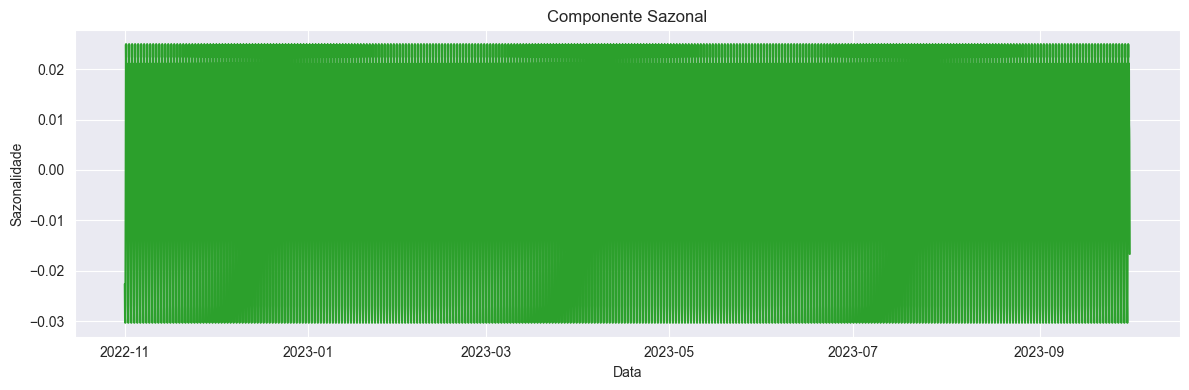

In [19]:
series = df_cp['EnergyNormalized'] # Extrai a série horária de consumo energético normalizado

result = seasonal_decompose(series, model='additive', period=24) # Aplica a decomposição sazonal usando um modelo aditivo.period=24 assume padrão diário (sazonalidade a cada 24 horas)
plt.figure(figsize=(12, 4)) # Cria uma nova figura com tamanho 12x4 polegadas para visualizar a componente sazonal
plt.plot(result.seasonal, color='tab:green') # Plota a componente sazonal da série (variação cíclica diária)

# Define o título e os rótulos dos eixos
plt.title('Componente Sazonal')
plt.ylabel('Sazonalidade')
plt.xlabel('Data')

plt.tight_layout() # Ajusta automaticamente o layout para evitar sobreposição de elementos
plt.savefig(f'../figuras/seasonal.png', dpi=300, bbox_inches='tight') # Guarda o gráfico como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento                  | Interpretação                                                                                                                                                        |
| ------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Amplitude de sazonalidade | Varia entre cerca de +0.024 e –0.032, indicando que—ao longo de cada dia—a componente diária adiciona ou subtrai até \~0.03 ao valor médio da série.                 |
| Período                   | Ciclo claramente diário (24h), visível pelo padrão que se repete todos os dias sem grandes desvios ao longo dos meses.                                              |
| Picos horários            | Os valores positivos máximos ocorrem tipicamente no meio do dia (aprox. 09h–17h), refletindo o aumento de consumo nos horários de atividade residencial e comercial. |
| Vales horários            | Os valores mínimos aparecem sempre à madrugada (aprox. 00h–05h), correspondendo ao período de menor demanda energética.                                              |
| Consistência temporal     | A forma e amplitude desse padrão sazonal mantêm-se muito estáveis de novembro a setembro, indicando sazonalidade diária robusta e invariante ao longo do ano.        |

# 📊 Grafico: residual

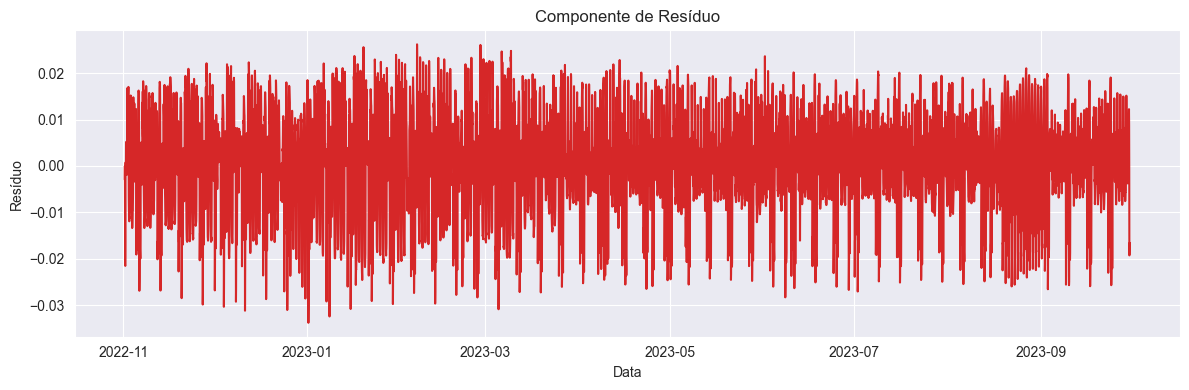

In [20]:
series = df_cp['EnergyNormalized'] # Extrai a série horária de consumo energético normalizado

result = seasonal_decompose(series, model='additive', period=24) # Aplica a decomposição sazonal da série temporal utilizando um modelo aditivo. period=24 assume que há um padrão diário (sazonalidade a cada 24 horas)
plt.figure(figsize=(12, 4)) # Cria uma nova figura com tamanho 12x4 polegadas para visualizar a componente de resíduo
plt.plot(result.resid, color='tab:red') # Plota a componente de resíduo (parte não explicada pela tendência nem pela sazonalidade)

# Define o título e os rótulos dos eixos
plt.title('Componente de Resíduo')
plt.ylabel('Resíduo')
plt.xlabel('Data')

plt.tight_layout() # Ajusta automaticamente o layout para evitar cortes de conteúdo
plt.savefig(f'../figuras/residual.png', dpi=300, bbox_inches='tight') # Guarda o gráfico da componente residual como imagem PNG na pasta 'figuras'
plt.show() # Mostra o gráfico

# 📈 Interpretação
| Elemento                       | Interpretação                                                                                                                                                             |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Amplitude dos resíduos         | Varia aproximadamente entre –0.035 e +0.025, mostrando que, após remover tendência e sazonalidade, há desvios de até \~0.03 no consumo normalizado.                       |
| Média dos resíduos             | Centra-se muito próximo de zero, o que indica que não há viés sistemático remanescente após a decomposição aditiva.                                                       |
| Aleatoriedade                  | O padrão aparenta ser “ruído” sem ciclos regulares visíveis, característico de variações imprevisíveis e efeitos pontuais não explicados pelos componentes principais.    |
| Picos de resíduo               | Grandes oscilações (picos positivos ou negativos) correspondem a eventos atípicos, erros de medição ou variações extraordinárias de demanda não capturadas pelos modelos. |
| Consistência ao longo do tempo | A intensidade dos resíduos mantém-se relativamente constante durante todo o período, sugerindo que a incerteza (ruído) não varia muito de uma estação para outra.         |
